In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import kagglehub
import os

import warnings
warnings.filterwarnings('ignore')

In [10]:
## LOAD DATASET

try:
    # Download and get the path
    download_path = kagglehub.dataset_download("shriyashjagtap/indian-personal-finance-and-spending-habits")
    
    
    for file in os.listdir(download_path):
        if file.endswith('.csv'):
            file_path = os.path.join(download_path, file)
            df = pd.read_csv(file_path)
            break
    print(f"Dataset loaded from: {file_path}")
    
except Exception as e:
    print(f"Download failed: {e}")
    print("Please ensure you have Kaggle API credentials setup")

Dataset loaded from: /home/daydreamer/.cache/kagglehub/datasets/shriyashjagtap/indian-personal-finance-and-spending-habits/versions/1/data.csv


In [11]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [12]:
df[['Income','Disposable_Income','Potential_Savings_Groceries','Desired_Savings']].head(10)

,Income,Disposable_Income,Potential_Savings_Groceries,Desired_Savings
0,44637.249636,11265.627707,1685.696222,6200.537192
1,26858.596592,9676.818733,540.306561,1923.176434
2,50367.605084,13891.450624,1466.073984,7050.360422
3,101455.600247,31617.953615,1875.932770,16694.965136
4,24875.283548,6265.700532,788.953124,1874.099434
5,24875.610267,7599.265300,957.619116,1478.666359
6,106119.692762,41595.325723,2799.234658,18399.564592
7,55431.341508,8465.944597,1059.499640,6636.413893
8,20606.733121,362.917872,822.974023,362.917872
9,46304.790235,15690.256276,962.019888,5615.104745


The number of students aged 18 and 81 are very close. 
The data is Synthetic and no meaningful insights can be derived from this. However we can still perform cleaning and visualization. 

By inspecting certain data I am manually removing some data which will not exist in the real world

In [13]:
def MakeRealistic(filtindex,pct):
    global df
    ## Removing Students aged 30 and above

    # Removing x% 
    removecount = int(len(filtindex) * pct)
    
    # Randomly select 90% to remove
    indicesremove = np.random.choice(filtindex, size=removecount, replace=False)
    df = df.drop(indicesremove)

    print(f"Removed : {removecount} rows")
    

In [15]:
## 1. Remove Early Retirees
filtered = df[(df['Age'] < 55 ) & (df['Occupation'] == 'Retired')].index
MakeRealistic(filtered,0.85)

Removed : 3315 rows


In [16]:
## 2. Remove old aged students
filtered = df[(df['Age'] > 30 ) & (df['Occupation'] == 'Student')].index
MakeRealistic(filtered,0.9)

Removed : 3213 rows


In [17]:
## 3. Remove Young Self Employed
filtered = df[(df['Age'] < 25 ) & (df['Occupation'] == 'Self_Employed')].index
MakeRealistic(filtered,0.8)

Removed : 594 rows


In [18]:
## 3. Remove Young people with dependants
filtered = df[(df['Age'] < 25 ) & (df["Dependents"] > 2)].index
MakeRealistic(filtered,0.9)

Removed : 648 rows


In [19]:
cols = list(df.columns)
cols

['Income',
 'Age',
 'Dependents',
 'Occupation',
 'City_Tier',
 'Rent',
 'Loan_Repayment',
 'Insurance',
 'Groceries',
 'Transport',
 'Eating_Out',
 'Entertainment',
 'Utilities',
 'Healthcare',
 'Education',
 'Miscellaneous',
 'Desired_Savings_Percentage',
 'Desired_Savings',
 'Disposable_Income',
 'Potential_Savings_Groceries',
 'Potential_Savings_Transport',
 'Potential_Savings_Eating_Out',
 'Potential_Savings_Entertainment',
 'Potential_Savings_Utilities',
 'Potential_Savings_Healthcare',
 'Potential_Savings_Education',
 'Potential_Savings_Miscellaneous']

In [23]:
df['ID'] = range(len(df))
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,ID
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,0
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,1
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,2
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,3
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,...,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917,19995
19996,90295.772638,21,1,Student,Tier_2,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,...,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046,19996
19997,40604.567373,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277,19997
19998,118157.817240,27,2,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212,19998


In [20]:
## Break down data
data = df[['Age','Income','City_Tier','Occupation','Dependents',]]
expenses = df[['Rent', 'Loan_Repayment', 'Insurance', 'Groceries',
               'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
                'Healthcare', 'Education', 'Miscellaneous',]]
desired = df[['Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income',]]
potentialSaves = df[['Potential_Savings_Groceries','Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
                      'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
                      'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',]]

In [21]:
## set colour pallete

customcolors = ['#e3170a', '#4B5842', '#197BBD', '#f7b32b', '#2d1e2f']  
cmap = mcolors.LinearSegmentedColormap.from_list('custom', customcolors)
bgcolor = '#EEF0F2'

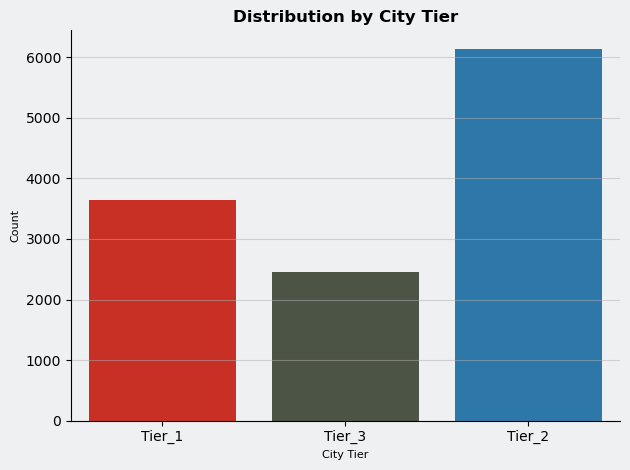

In [22]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
sns.countplot(data=data, x='City_Tier', palette=customcolors, ax=ax)

sns.despine()

# Add grid
ax.grid(True, axis='y', alpha=0.5)

# Title and labels
ax.set_title('Distribution by City Tier', fontsize=12, fontweight='bold')
ax.set_xlabel('City Tier', fontsize=8)
ax.set_ylabel('Count', fontsize=8)


plt.tight_layout()
plt.show()

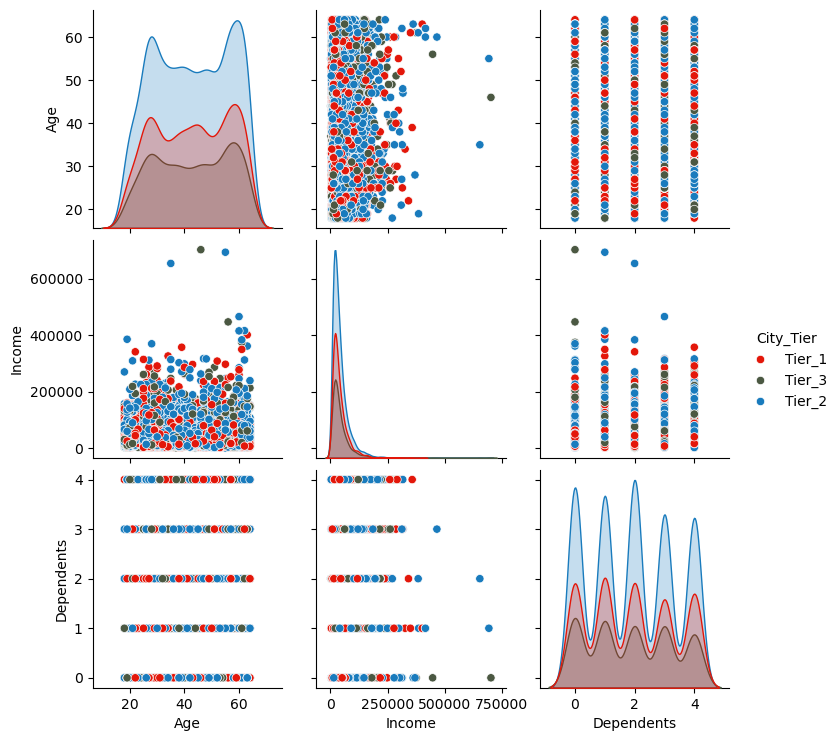

In [23]:
sns.pairplot(data, hue='City_Tier',palette=customcolors)
plt.show()

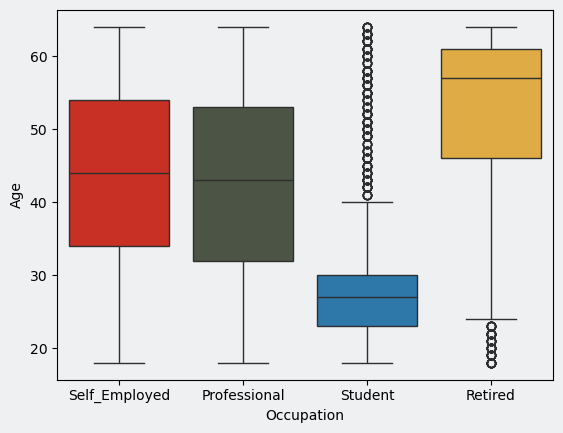

In [24]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)

sns.boxplot(data=data, 
            x='Occupation', 
            y='Age',  # Changed to age
            palette=customcolors,
            ax=ax)
plt.show()

In [123]:
data

,Age,Income,City_Tier,Occupation,Dependents
0,49,44637.249636,Tier_1,Self_Employed,0
1,34,26858.596592,Tier_2,Retired,2
2,35,50367.605084,Tier_3,Student,1
3,21,101455.600247,Tier_3,Self_Employed,0
4,52,24875.283548,Tier_2,Professional,4
...,...,...,...,...,...
19995,51,40913.466178,Tier_1,Self_Employed,4
19996,21,90295.772638,Tier_2,Student,1
19997,30,40604.567373,Tier_2,Professional,1
19998,27,118157.817240,Tier_1,Professional,2
